# JUPYTER NOTEBOOK FOR DEMONSTRATING MCMC
Estimate the bias of a coin given a sample consisting of n tosses - 
Adapted from https://people.duke.edu/~ccc14/sta-663/MCMC.html

In [1]:
import os
import sys
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st

%matplotlib inline
%precision 4
plt.style.use('ggplot')

In [2]:
from mpl_toolkits.mplot3d import Axes3D
import scipy.stats as stats
from functools import partial

np.random.seed(1234)

74.41176470588235
1.7149858514250884


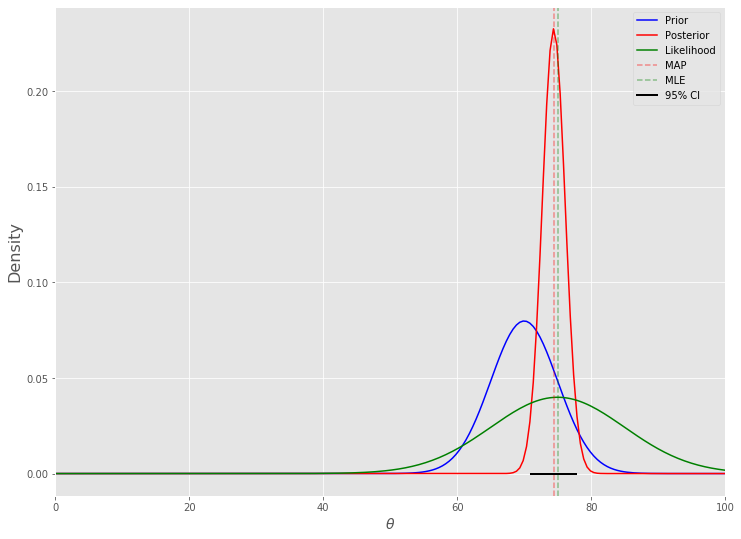

In [3]:
"""
We use a beta distribution as the prior, so that the posterior has a closed form solution. 
    We choose a prior, the beta distribtuiton as well as its parameters (a=10, b=10)
"""
# n = 100
# h = 61 #number of heads
# p = h/n
# rv = st.binom(n, p)
# mu = rv.mean()

# a, b = 10, 10
# prior = st.beta(a, b)
# post = st.beta(h+a, n-h+b)
# ci = post.interval(0.95)

# thetas = np.linspace(0, 1, 200)
# plt.figure(figsize=(12, 9))
# plt.style.use('ggplot')
# plt.plot(thetas, prior.pdf(thetas), label='Prior', c='blue')
# plt.plot(thetas, post.pdf(thetas), label='Posterior', c='red')
# plt.plot(thetas, n*st.binom(n, thetas).pmf(h), label='Likelihood', c='green')
# plt.axvline((h+a-1)/(n+a+b-2), c='red', linestyle='dashed', alpha=0.4, label='MAP')
# plt.axvline(mu/n, c='green', linestyle='dashed', alpha=0.4, label='MLE')
# plt.xlim([0, 1])
# plt.axhline(0.3, ci[0], ci[1], c='black', linewidth=2, label='95% CI');
# plt.xlabel(r'$\theta$', fontsize=14)
# plt.ylabel('Density', fontsize=16)
# plt.legend();


n = 100
h = 61 #number of heads
p = h/n

# calculate tha MAP and variance of posterior of Gaussian
MAP=((10**2)*70+(5**2)*75*30)/(10**2+30*(5**2))
variance=np.sqrt((10**2)*(5**2)/(10**2+(5**2)*30))

# give the function of prior,likelihood and posterior
prior=st.norm(70,5)
post=st.norm(MAP,variance)
likelihood=st.norm(75,10)
print(MAP)
print(variance)

# give the plot of prior,likelihood and posterior
thetas = np.linspace(0, 100, 200)
plt.figure(figsize=(12, 9))
plt.style.use('ggplot')
plt.plot(thetas, prior.pdf(thetas), label='Prior', c='blue')
plt.plot(thetas, post.pdf(thetas), label='Posterior', c='red')
plt.plot(thetas, likelihood.pdf(thetas), label='Likelihood', c='green')
plt.xlim([0, 100])

# the vertical lines which are MAP and MLE
plt.axvline(MAP, c='red', linestyle='dashed', alpha=0.4, label='MAP')
plt.axvline(75, c='green', linestyle='dashed', alpha=0.4, label='MLE')

# draw the 95%CI line
ci = post.interval(0.95)
plt.axhline(0.0, ci[0]/100, ci[1]/100, c='black', linewidth=2, label='95% CI');

plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel('Density', fontsize=16)
plt.legend();

In [4]:
'''Next we review the Metropolis sampler for the posterior. 

'''
# def target(lik, prior, n, h, theta):
#     if theta < 0 or theta > 1:
#         return 0
#     else:
#         return lik(n, theta).pmf(h)*prior.pdf(theta)

# n = 100
# h = 61
# a = 10
# b = 10
# lik = st.binom
# prior = st.beta(a, b)
# sigma = 0.3 #jump

# naccept = 0
# theta = 0.1
# niters = 50000
# samples = np.zeros(niters+1)
# samples[0] = theta
# for i in range(niters):
#     theta_p = theta + st.norm(0, sigma).rvs() #candidate theta from proposal distribution
#     rho = min(1, target(lik, prior, n, h, theta_p)/target(lik, prior, n, h, theta ))
#     u = np.random.uniform()
#     if u < rho:
#         naccept += 1
#         theta = theta_p
#     samples[i+1] = theta
# nmcmc = len(samples)//2
# print("Efficiency = ", naccept/niters)

# a known distribution which is used to determine the candidate state                              
def target(lik, prior, theta):
    y=st.norm.pdf(theta,lik.mean(),lik.std())*st.norm.pdf(theta,prior.mean(),prior.std())
    return y
  
    
n=100
h = 61
sigma = 0.3 #jump
lik=st.norm(75,10)
prior=st.norm(70,5)
MAP=((10**2)*70+(5**2)*75*30)/(10**2+30*(5**2))
variance=np.sqrt((10**2)*(5**2)/(10**2+(5**2)*30))
post=st.norm(MAP,variance)


naccept=0
theta=0.1
niters=50000
samples = np.zeros(niters+1)
samples[0] = theta

# the algorithm of Metropolis Hasting which include uniform distribution and determine whether reject the candidate state or not
for i in range(niters):
    theta_p = st.norm.rvs(loc=samples[i],scale=sigma,size=1,random_state=None) #candidate theta from proposal distribution
    rho = min(1, target(lik,prior,theta_p)/target(lik,prior,samples[i]))
    u = np.random.uniform()
    if u < rho:
        naccept += 1
        theta = theta_p
    samples[i+1] = theta
nmcmc = len(samples)//2
print("Efficiency = ", naccept/niters)



Efficiency =  0.97588


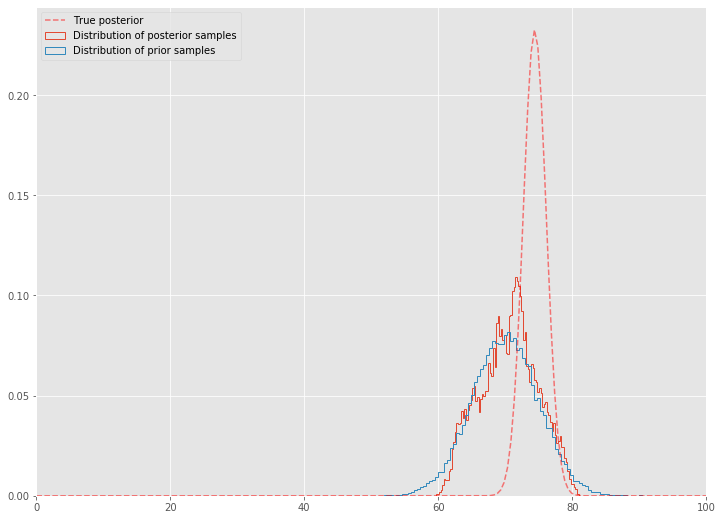

In [5]:
'''
Now compare the true closed form solution of the prosterior with the plot obtained from our sampling algorithm

'''
# post = st.beta(h+a, n-h+b)
plt.figure(figsize=(12, 9))
plt.hist(samples[nmcmc:], 90, histtype='step', density=True, linewidth=1, label='Distribution of posterior samples');
# rvs is used to generate the number of random variables of certain distribution
plt.hist(prior.rvs(nmcmc), 90, histtype='step', density=True, linewidth=1, label='Distribution of prior samples');
plt.plot(thetas, post.pdf(thetas), c='red', linestyle='--', alpha=0.5, label='True posterior')
plt.xlim([0,100]);
plt.legend(loc='best');